In [2]:
import re
import matplotlib
import matplotlib.colors as colors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import sys
import gzip
import matplotlib.gridspec as gridspec
from scipy.stats import norm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
labels = ['4_log1d_no', '4_log2d_no','4_log1d_p1','4_log2d_p1',
          '2_log1d_no', '2_log2d_no','2_log1d_p1','2_log2d_p1',
          '1_log1d_no', '1_log2d_no','1_log1d_p1','1_log2d_p1',
         '3_log1d_no', '3_log2d_no','3_log1d_p1','3_log2d_p1',
         '5_log1d_no', '5_log2d_no','5_log1d_p1','5_log2d_p1',]

KL_list_names = ['KL_list_all','KL_list_p50','KL_list_p25','KL_list_p10','KL_list_p05','KL_list_p01']
R2_list_names = ['R2_list_all','R2_list_p50','R2_list_p25','R2_list_p10','R2_list_p05','R2_list_p01']
X2_list_names = ['X2_list_all','X2_list_p50','X2_list_p25','X2_list_p10','X2_list_p05','X2_list_p01']



In [3]:
filepath = '/tigress/dropulic/Rsquare_list_sorted_2.txt'
sigmas = []
R2s = []
with open(filepath, "r") as fp:
    for line in open(filepath, "r"):
        line = fp.readline()
        sigma = re.search('sigmaleq (\d+.\d+)', line)
        sigmas.append(float(sigma.group(1)))
        R = re.search('R2 = ([+-]?\d+(?:\.\d+)?)', line)
        R2s.append(float(R.group(1)))

<Figure size 800x800 with 0 Axes>

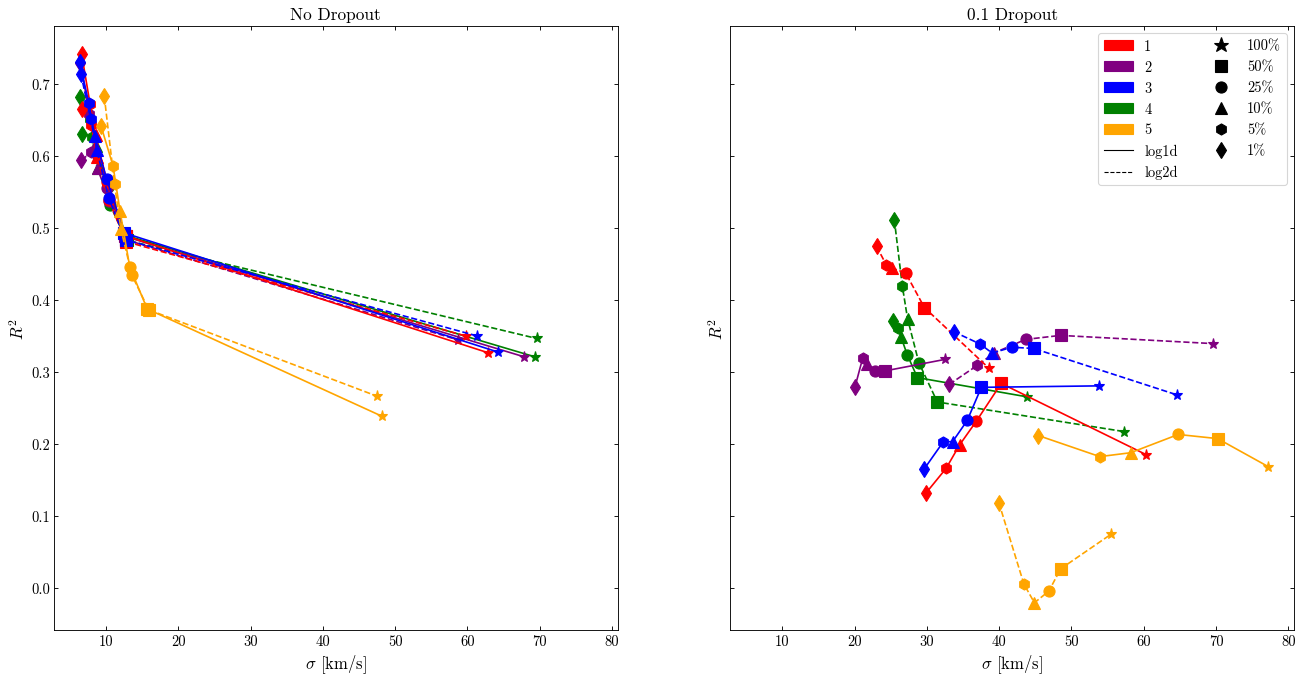

In [4]:
plt.figure(figsize=(10,10))
count = 0
R2_list_all = []
R2_list_p50 = []
R2_list_p25 = []
R2_list_p10 = []
R2_list_p05 = []
R2_list_p01 = []
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
#plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
from matplotlib.colors import LogNorm
all_poss=['d','h','^','o','s','*']
for list_idx in range (len(sigmas)):
    if list_idx % 6 == 0:
        X = sigmas[list_idx:list_idx+6]
        Y = R2s[list_idx:list_idx+6]
        indices = np.argsort(np.array(X))
        string_label = labels[count]
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        R2_list_all.append(np.array(Y)[indices[5]])
        R2_list_p50.append(np.array(Y)[indices[4]])
        R2_list_p25.append(np.array(Y)[indices[3]])
        R2_list_p10.append(np.array(Y)[indices[2]])
        R2_list_p05.append(np.array(Y)[indices[1]])
        R2_list_p01.append(np.array(Y)[indices[0]])
        num = 0
        if string_label.endswith('no'):
            if "log1d" in string_label: linestyle = '-'
            elif "log2d" in string_label: linestyle = '--'
            ax[0].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                ax[0].plot(np.array(X)[index_i], np.array(Y)[index_i], label= labels[count], color = color, marker = all_poss[num], linestyle = linestyle, ms = 10)
                num = num + 1
        elif string_label.endswith('p1'): 
            if "log1d" in string_label: linestyle = '-'
            if "log2d" in string_label: linestyle = '--'
            ax[1].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                ax[1].plot(np.array(X)[index_i], np.array(Y)[index_i], label= labels[count], color = color,marker = all_poss[num], linestyle = linestyle, ms = 10)
                num = num + 1
        count = count + 1
    else: 
        continue
red_patch = mpatches.Patch(color='red', label='1')
purple_patch = mpatches.Patch(color='purple', label='2')
blue_patch = mpatches.Patch(color='blue', label='3')
green_patch = mpatches.Patch(color='green', label='4')
orange_patch = mpatches.Patch(color='orange', label='5')
solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='log1d')
dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='log2d')
all_stars = Line2D([0], [0], marker='*', label='100%',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
p50_stars = Line2D([0], [0], marker='s', label='50%',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
p25_stars = Line2D([0], [0], marker='o', label='25%',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
p10_stars = Line2D([0], [0], marker='^', label='10%',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
p05_stars = Line2D([0], [0], marker='h', label='5%',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
p01_stars = Line2D([0], [0], marker='d', label='1%',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
#plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                   p10_stars,p05_stars,p01_stars], ncol = 2)
ax[0].set_title('No Dropout')    
ax[1].set_title('0.1 Dropout')
ax[0].set_xlabel('$\sigma$ [km/s]')
ax[0].set_ylabel('$R^{2}$')
ax[1].set_xlabel('$\sigma$ [km/s]')
ax[1].set_ylabel('$R^{2}$')
#plt.legend(loc='upper left')
plt.savefig('rsquare.png')

In [5]:
filepath2 = '/tigress/dropulic/KL_list_sorted_2.txt'
#sigmas = []
KLs = []
with open(filepath2, "r") as fp2:
    for line in open(filepath2, "r"):
        line = fp2.readline()
        kl = re.search('KL = ([+-]?\d+(?:\.\d+)?)', line)
        #print(float(kl.group(1)))
        KLs.append(float(kl.group(1)))

<Figure size 800x800 with 0 Axes>

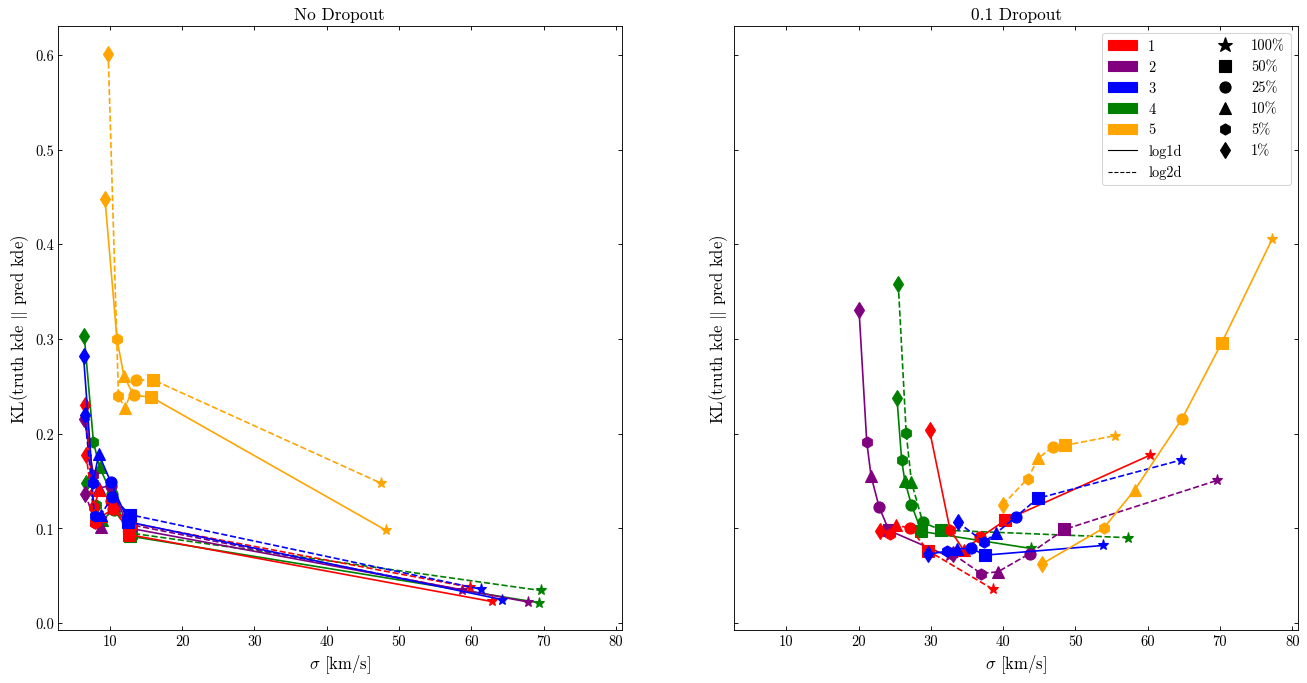

In [6]:
plt.figure(figsize=(10,10))
count = 0
KL_list_all = []
KL_list_p50 = []
KL_list_p25 = []
KL_list_p10 = []
KL_list_p05 = []
KL_list_p01 = []
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
#plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
from matplotlib.colors import LogNorm
all_poss=['d','h','^','o','s','*']
for list_idx in range (len(sigmas)):
    if list_idx % 6 == 0:
        X = sigmas[list_idx:list_idx+6]
        Y = KLs[list_idx:list_idx+6]
        indices = np.argsort(np.array(X))
        string_label = labels[count]
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        KL_list_all.append(np.array(Y)[indices[5]])
        KL_list_p50.append(np.array(Y)[indices[4]])
        KL_list_p25.append(np.array(Y)[indices[3]])
        KL_list_p10.append(np.array(Y)[indices[2]])
        KL_list_p05.append(np.array(Y)[indices[1]])
        KL_list_p01.append(np.array(Y)[indices[0]])
        #linestyle = ' '
        num = 0
        if string_label.endswith('no'):
            if "log1d" in string_label: linestyle = '-'
            elif "log2d" in string_label: linestyle = '--'
            ax[0].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                #print(all_poss[num])
                ax[0].plot(np.array(X)[index_i], np.array(Y)[index_i], label= labels[count], color = color, marker = all_poss[num], linestyle = linestyle, ms = 10)
                num = num + 1
        elif string_label.endswith('p1'): 
            if "log1d" in string_label: linestyle = '-'
            if "log2d" in string_label: linestyle = '--'
            ax[1].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                ax[1].plot(np.array(X)[index_i], np.array(Y)[index_i], label= labels[count], color = color,marker = all_poss[num], linestyle = linestyle, ms = 10)
                num = num + 1
        count = count + 1
    else: 
        continue
plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                   p10_stars,p05_stars,p01_stars], ncol = 2)
ax[0].set_title('No Dropout')    
ax[1].set_title('0.1 Dropout')  
ax[0].set_xlabel('$\sigma$ [km/s]')
ax[0].set_ylabel('KL(truth kde $||$ pred kde)')
ax[1].set_xlabel('$\sigma$ [km/s]')
ax[1].set_ylabel('KL(truth kde $||$ pred kde)')

plt.savefig('KL.png')

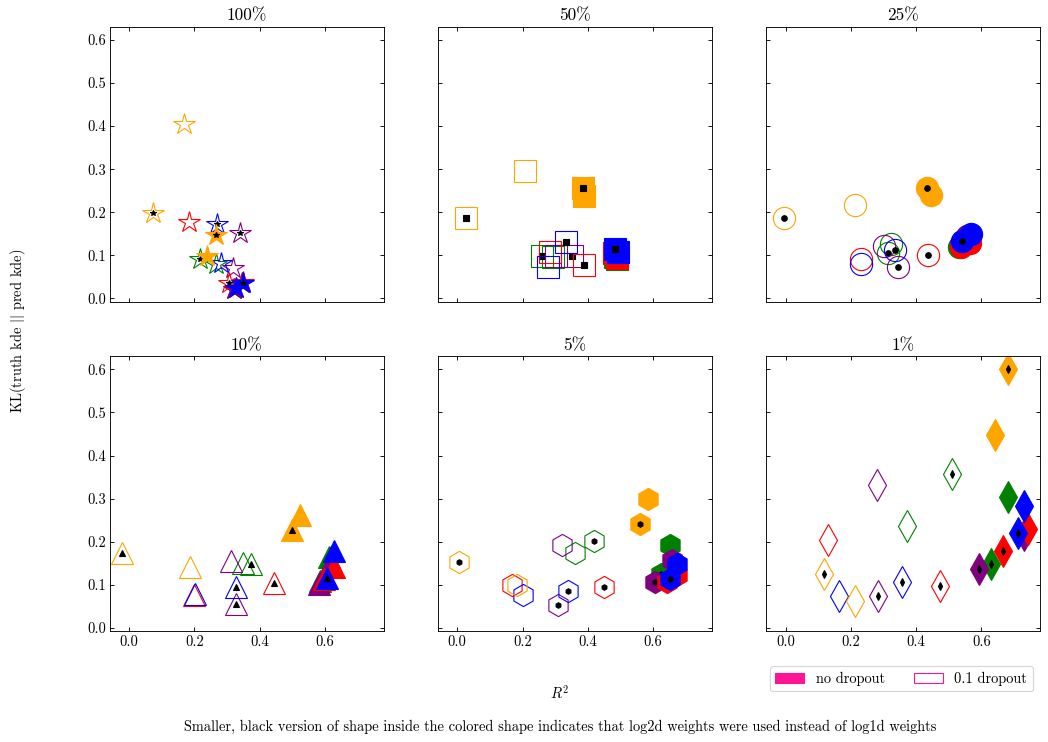

In [7]:
fig_cuts, ax_cuts = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(15,10))
all_poss_flip = ['*','s','o','^','h','d']
title_list = ['100%','50%','25%','10%','5%','1%']
count_new = 0
for cut_i in range(0,6):
    count_new = 0
    #print(cut_i)
    KL_list_iter = eval(KL_list_names[cut_i])
    R2_list_iter = eval(R2_list_names[cut_i])
    plot_x_coord = -1
    plot_y_coord = -1
    #print(len(KL_list_iter))
    for idx_i in range(len(KL_list_iter)):
        #print(idx_i)
        #print(len(KL_list_iter))
        if cut_i in [0,1,2]: plot_x_coord = 0
        elif cut_i in [3,4,5]: plot_x_coord = 1
        if KL_list_names[cut_i] == 'KL_list_all': plot_y_coord = 0
        if KL_list_names[cut_i] == 'KL_list_p50': plot_y_coord = 1
        if KL_list_names[cut_i] == 'KL_list_p25': plot_y_coord = 2
        if KL_list_names[cut_i] == 'KL_list_p10': plot_y_coord = 0
        if KL_list_names[cut_i] == 'KL_list_p05': plot_y_coord = 1
        if KL_list_names[cut_i] == 'KL_list_p01': plot_y_coord = 2
        #print(count_new)
        string_label = labels[count_new]
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if string_label.endswith('no'):markerfacecolor= color
        elif string_label.endswith('p1'):markerfacecolor='None' 
        ax_cuts[plot_x_coord,plot_y_coord].plot(R2_list_iter[idx_i],KL_list_iter[idx_i], color= color, markerfacecolor = markerfacecolor, marker = all_poss_flip[cut_i], ms = 20)
        if "log2d" in string_label: ax_cuts[plot_x_coord,plot_y_coord].plot(R2_list_iter[idx_i],KL_list_iter[idx_i], color= 'black', markerfacecolor = 'black', marker = all_poss_flip[cut_i], ms = 5)
        count_new = count_new +1 
    ax_cuts[plot_x_coord,plot_y_coord].set_title(title_list[cut_i])
pink_patch_no = mpatches.Patch(edgecolor='deeppink',facecolor='deeppink', label='no dropout')
pink_patch_p1 = mpatches.Patch(edgecolor='deeppink',facecolor='None', label='0.1 dropout')
plt.legend(handles=[pink_patch_no, pink_patch_p1], bbox_to_anchor=(1, -0.1),ncol=5)
fig_cuts.text(0.5, 0.04, '$R^{2}$', ha='center')
fig_cuts.text(0.04, 0.5, 'KL(truth kde $||$ pred kde)', va='center', rotation='vertical')
text = 'Smaller, black version of shape inside the colored shape indicates that log2d weights were used instead of log1d weights'
fig_cuts.text(.5, 0.0, text, ha='center')
plt.savefig('KLvsR2.png')

In [8]:
filepath3 = '/tigress/dropulic/Xsquare_list_sorted.txt'
Xsquares = []
with open(filepath3, "r") as fp3:
    for line in open(filepath3, "r"):
        line = fp3.readline()
        x2 = re.search('X2 = ([+-]?\d+(?:\.\d+)?)', line)
        #print(float(x2.group(1)))
        Xsquares.append(float(x2.group(1)))

<Figure size 800x800 with 0 Axes>

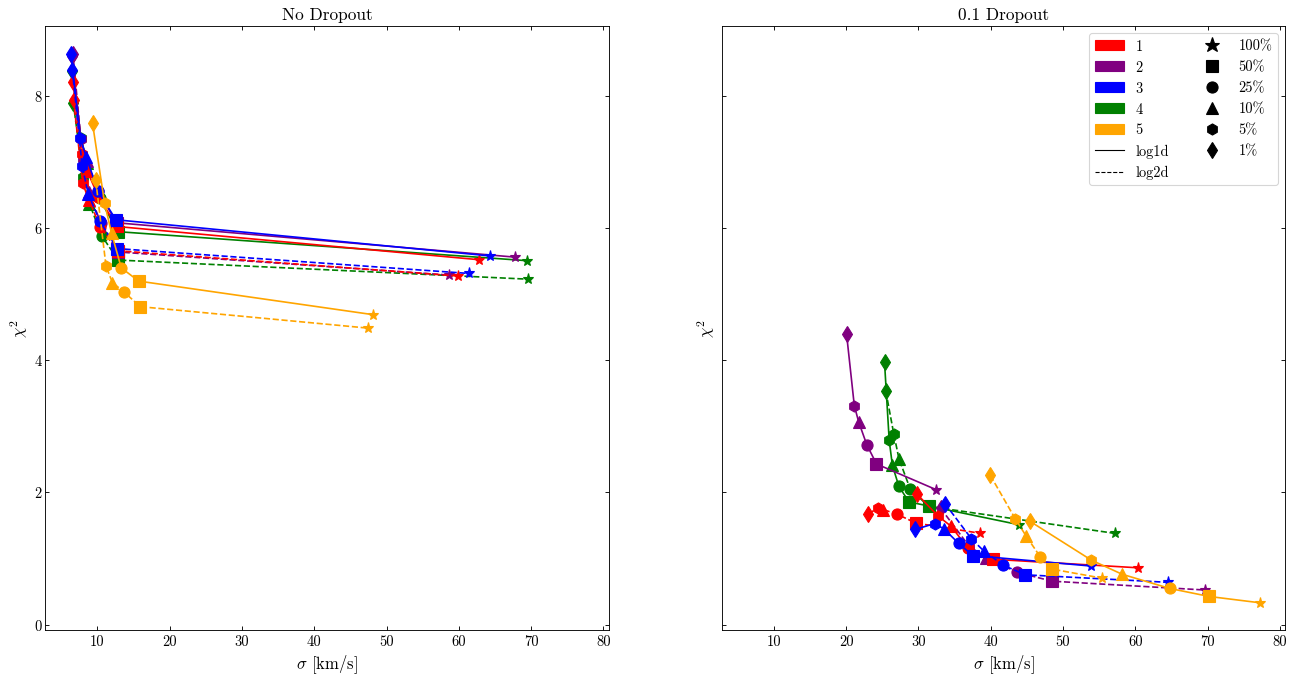

In [9]:
plt.figure(figsize=(10,10))
count = 0
X2_list_all = []
X2_list_p50 = []
X2_list_p25 = []
X2_list_p10 = []
X2_list_p05 = []
X2_list_p01 = []
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
#plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
from matplotlib.colors import LogNorm
all_poss=['d','h','^','o','s','*']
for list_idx in range (len(sigmas)):
    if list_idx % 6 == 0:
        X = sigmas[list_idx:list_idx+6]
        Y = Xsquares[list_idx:list_idx+6]
        indices = np.argsort(np.array(X))
        string_label = labels[count]
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        X2_list_all.append(np.array(Y)[indices[5]])
        X2_list_p50.append(np.array(Y)[indices[4]])
        X2_list_p25.append(np.array(Y)[indices[3]])
        X2_list_p10.append(np.array(Y)[indices[2]])
        X2_list_p05.append(np.array(Y)[indices[1]])
        X2_list_p01.append(np.array(Y)[indices[0]])
        #linestyle = ' '
        num = 0
        if string_label.endswith('no'):
            if "log1d" in string_label: linestyle = '-'
            elif "log2d" in string_label: linestyle = '--'
            ax[0].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                #print(all_poss[num])
                ax[0].plot(np.array(X)[index_i], np.array(Y)[index_i], label= labels[count], color = color, marker = all_poss[num], linestyle = linestyle, ms = 10)
                num = num + 1
        elif string_label.endswith('p1'): 
            if "log1d" in string_label: linestyle = '-'
            if "log2d" in string_label: linestyle = '--'
            ax[1].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                ax[1].plot(np.array(X)[index_i], np.array(Y)[index_i], label= labels[count], color = color,marker = all_poss[num], linestyle = linestyle, ms = 10)
                num = num + 1
        count = count + 1
    else: 
        continue
plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                   p10_stars,p05_stars,p01_stars], ncol = 2)
ax[0].set_title('No Dropout')    
ax[1].set_title('0.1 Dropout')  
ax[0].set_xlabel('$\sigma$ [km/s]')
ax[0].set_ylabel('$\chi^{2}$')
ax[1].set_xlabel('$\sigma$ [km/s]')
ax[1].set_ylabel('$\chi^{2}$')

plt.savefig('Xsquare.png')

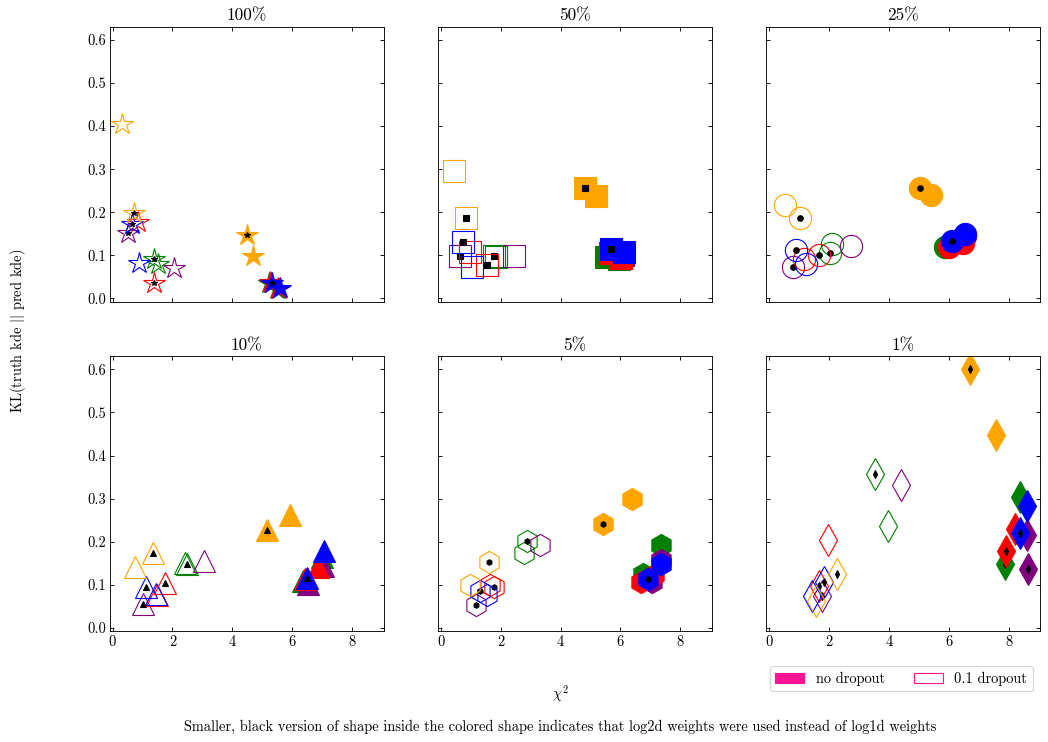

In [10]:
fig_cuts_KX, ax_cuts_KX = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(15,10))
all_poss_flip = ['*','s','o','^','h','d']
title_list = ['100%','50%','25%','10%','5%','1%']
count_new = 0
for cut_i in range(0,6):
    count_new = 0
    #print(cut_i)
    KL_list_iter = eval(KL_list_names[cut_i])
    X2_list_iter = eval(X2_list_names[cut_i])
    plot_x_coord = -1
    plot_y_coord = -1
    #print(len(KL_list_iter))
    for idx_i in range(len(KL_list_iter)):
        #print(idx_i)
        #print(len(KL_list_iter))
        if cut_i in [0,1,2]: plot_x_coord = 0
        elif cut_i in [3,4,5]: plot_x_coord = 1
        if KL_list_names[cut_i] == 'KL_list_all': plot_y_coord = 0
        if KL_list_names[cut_i] == 'KL_list_p50': plot_y_coord = 1
        if KL_list_names[cut_i] == 'KL_list_p25': plot_y_coord = 2
        if KL_list_names[cut_i] == 'KL_list_p10': plot_y_coord = 0
        if KL_list_names[cut_i] == 'KL_list_p05': plot_y_coord = 1
        if KL_list_names[cut_i] == 'KL_list_p01': plot_y_coord = 2
        #print(count_new)
        string_label = labels[count_new]
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if string_label.endswith('no'):markerfacecolor= color
        elif string_label.endswith('p1'):markerfacecolor='None' 
        ax_cuts_KX[plot_x_coord,plot_y_coord].plot(X2_list_iter[idx_i],KL_list_iter[idx_i], color= color, markerfacecolor = markerfacecolor, marker = all_poss_flip[cut_i], ms = 20)
        if "log2d" in string_label: ax_cuts_KX[plot_x_coord,plot_y_coord].plot(X2_list_iter[idx_i],KL_list_iter[idx_i], color= 'black', markerfacecolor = 'black', marker = all_poss_flip[cut_i], ms = 5)
        count_new = count_new +1 
    ax_cuts_KX[plot_x_coord,plot_y_coord].set_title(title_list[cut_i])
pink_patch_no = mpatches.Patch(edgecolor='deeppink',facecolor='deeppink', label='no dropout')
pink_patch_p1 = mpatches.Patch(edgecolor='deeppink',facecolor='None', label='0.1 dropout')
plt.legend(handles=[pink_patch_no, pink_patch_p1], bbox_to_anchor=(1, -0.1),ncol=5)
fig_cuts_KX.text(0.5, 0.04, '$\chi^{2}$', ha='center')
fig_cuts_KX.text(0.04, 0.5, 'KL(truth kde $||$ pred kde)', va='center', rotation='vertical')
text = 'Smaller, black version of shape inside the colored shape indicates that log2d weights were used instead of log1d weights'
fig_cuts_KX.text(.5, 0.0, text, ha='center')
plt.savefig('KLvsX2.png')

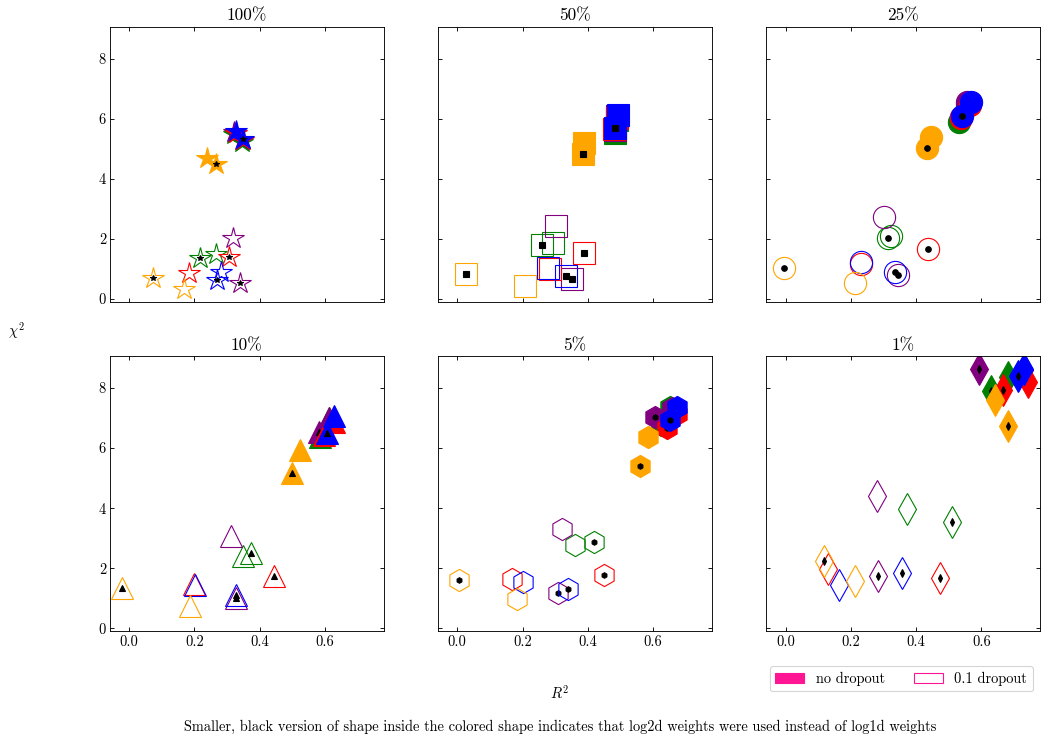

In [11]:
fig_cuts_XR, ax_cuts_XR = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(15,10))
all_poss_flip = ['*','s','o','^','h','d']
title_list = ['100%','50%','25%','10%','5%','1%']
count_new = 0
for cut_i in range(0,6):
    count_new = 0
    #print(cut_i)
    R2_list_iter = eval(R2_list_names[cut_i])
    X2_list_iter = eval(X2_list_names[cut_i])
    plot_x_coord = -1
    plot_y_coord = -1
    #print(len(KL_list_iter))
    for idx_i in range(len(R2_list_iter)):
        #print(idx_i)
        #print(len(KL_list_iter))
        if cut_i in [0,1,2]: plot_x_coord = 0
        elif cut_i in [3,4,5]: plot_x_coord = 1
        if R2_list_names[cut_i] == 'R2_list_all': plot_y_coord = 0
        if R2_list_names[cut_i] == 'R2_list_p50': plot_y_coord = 1
        if R2_list_names[cut_i] == 'R2_list_p25': plot_y_coord = 2
        if R2_list_names[cut_i] == 'R2_list_p10': plot_y_coord = 0
        if R2_list_names[cut_i] == 'R2_list_p05': plot_y_coord = 1
        if R2_list_names[cut_i] == 'R2_list_p01': plot_y_coord = 2
        #print(count_new)
        string_label = labels[count_new]
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if string_label.endswith('no'):markerfacecolor= color
        elif string_label.endswith('p1'):markerfacecolor='None' 
        ax_cuts_XR[plot_x_coord,plot_y_coord].plot(R2_list_iter[idx_i],X2_list_iter[idx_i], color= color, markerfacecolor = markerfacecolor, marker = all_poss_flip[cut_i], ms = 20)
        if "log2d" in string_label: ax_cuts_XR[plot_x_coord,plot_y_coord].plot(R2_list_iter[idx_i],X2_list_iter[idx_i], color= 'black', markerfacecolor = 'black', marker = all_poss_flip[cut_i], ms = 5)
        count_new = count_new +1 
    ax_cuts_XR[plot_x_coord,plot_y_coord].set_title(title_list[cut_i])
pink_patch_no = mpatches.Patch(edgecolor='deeppink',facecolor='deeppink', label='no dropout')
pink_patch_p1 = mpatches.Patch(edgecolor='deeppink',facecolor='None', label='0.1 dropout')
plt.legend(handles=[pink_patch_no, pink_patch_p1], bbox_to_anchor=(1, -0.1),ncol=5)
fig_cuts_XR.text(0.5, 0.04, '$R^{2}$', ha='center')
fig_cuts_XR.text(0.04, 0.5, '$\chi^{2}$', va='center', rotation='horizontal')
text = 'Smaller, black version of shape inside the colored shape indicates that log2d weights were used instead of log1d weights'
fig_cuts_XR.text(.5, 0.0, text, ha='center')
plt.savefig('X2vsR2.png')

In [5]:
set_load = np.load('/tigress/dropulic/G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbpppxyzsc_log2d_new/plots_test_2it_500000_tanh_D30_nodropout_seed1test1_lbpppxyzsc_log2d_new_testpreds_sigmaleq_0.npy')

In [6]:
np.mean(set_load[:,1])

13.850241

In [8]:
set_load_2 = np.load('/tigress/dropulic/G_train_2it_500000_tanh_D30_p1dropout_seed1_lbpppxyz_log2d_new/plots_test_2it_500000_tanh_D30_p1dropout_seed1_lbpppxyz_log2d_new_testpreds_sigmaleq_0.npy')

In [9]:
np.mean(set_load_2[:,1])

29.293505